# MJO analysis with unfied TDE

In [1]:
cd("$(homedir())/Documents/Repos/enso_project.jl")
using Pkg
Pkg.activate(".")

  Activating project at `C:\Users\lisah\Documents\Repos\enso_project.jl`


In [28]:
using ReservoirComputing, CSV, DataFrames, DynamicalSystems, Plots, enso_project, JLD2

In [4]:
header = ["year", "month", "day", "hour", "PC1 coeff", "PC2 coeff", "PC1+PC2 amplitude"]
data = CSV.read("data/mjo_data/mjo_romi.txt", DataFrame; delim=" ", ignorerepeated=true, header=header)

pc1 = data[!,"PC1 coeff"]
pc2 = data[!,"PC2 coeff"]
amp = data[!, "PC1+PC2 amplitude"];

In [5]:
unified_data = StateSpaceSet(pc1, pc2, amp)
Y, τ_vals, ts_vals, Ls, εs = pecuzal_embedding(unified_data)

Initializing PECUZAL algorithm for multivariate input...
Starting 1-th embedding cycle...
Starting 2-th embedding cycle...
Starting 3-th embedding cycle...
Starting 4-th embedding cycle...
Starting 5-th embedding cycle...
Starting 6-th embedding cycle...
Starting 7-th embedding cycle...
Starting 8-th embedding cycle...
Algorithm stopped due to increasing L-values. VALID embedding achieved ✓.


(8-dimensional StateSpaceSet{Float64} with 12562 points, [0, 13, 7, 10, 27, 21, 41, 34], [2, 2, 2, 2, 2, 2, 2, 2], [-0.001839927760191512, -0.1466043697132447, -0.08161150880551948, -0.05640641089185526, -0.10520331048308537, -0.04260407975040101, -0.04296166254296904], [[1.2872521799072547 0.0021239342349629988 0.8252399526152054; 1.282160994477721 0.20721353714830604 0.8497457548743683; … ; 1.276439017407599 1.2358166474013412 1.2440871190409857; 1.2785249303568869 1.2364753136507873 1.243737001909017] [0.9878038329750911 0.043329993113138544 0.7649539128308718; 0.9664901959070771 0.19320812964669065 0.7799364560183553; … ; 1.2396681563430918 1.2100487056993376 1.242291126065108; 1.2431450681374843 1.2172483643428178 1.241961023470586] … [0.856964484398566 0.28123191555314003 0.7715869890761738; 0.8438912343506744 0.28516187671814164 0.7641694872264836; … ; 0.9418247509380488 0.9637798286897664 1.0536129946791863; 0.9346920579739555 0.9978006220712899 1.0656546982899089] [0.833247093

In [18]:
Y

8-dimensional StateSpaceSet{Float64} with 12562 points
 -0.06945   0.31856   0.34553   0.44696  …   0.96613   0.30136   1.01386
 -0.04887   0.30929   0.41978   0.44401      1.09647   0.21646   0.91302
 -0.03933   0.33681   0.45432   0.39319      1.20131   0.14469   0.85056
  0.0199    0.36904   0.44696   0.31856      1.24241   0.13614   0.78449
  0.07555   0.42847   0.44401   0.30929      1.21328   0.06173   0.67238
  0.23959   0.50673   0.39319   0.33681  …   1.21517   0.05366   0.49555
  0.26655   0.66463   0.31856   0.36904      1.24032   0.10671   0.38286
  0.34553   0.81402   0.30929   0.42847      1.20034   0.22089   0.30136
  0.41978   0.96613   0.33681   0.50673      1.19385   0.31662   0.21646
  0.45432   1.09647   0.36904   0.66463      1.21125   0.32433   0.14469
  0.44696   1.20131   0.42847   0.81402  …   1.195     0.22089   0.13614
  0.44401   1.24241   0.50673   0.96613      1.1398   -0.01438   0.06173
  0.39319   1.21328   0.66463   1.09647      1.07896  -0.37633   0.05

In [17]:
data_pc2_emb = Matrix(transpose(Matrix(Y)))

8×12562 Matrix{Float64}:
 -0.06945  -0.04887  -0.03933  0.0199   …   0.56867   0.49267   0.43295
  0.31856   0.30929   0.33681  0.36904     -0.32039  -0.27262  -0.21293
  0.34553   0.41978   0.45432  0.44696     -0.14853  -0.20038  -0.25173
  0.44696   0.44401   0.39319  0.31856     -0.25259  -0.28836  -0.36453
  1.24032   1.20034   1.19385  1.21125     -0.0233    0.02671   0.02144
  0.96613   1.09647   1.20131  1.24241  …  -0.00988  -0.04641  -0.04137
  0.30136   0.21646   0.14469  0.13614     -0.40887  -0.38871  -0.34477
  1.01386   0.91302   0.85056  0.78449      0.00233  -0.04809  -0.16275

In [19]:
test_size = 100
train_size = Int(floor(size(Y,1)* 0.8))
val_size = size(Y,1) - test_size - train_size

data_pc2_emb_train = data_pc2_emb[:, 1:train_size]
data_pc2_emb_val = data_pc2_emb[:, train_size+1:train_size+val_size]
data_pc2_emb_test = data_pc2_emb[:, train_size+val_size+1:train_size+val_size+test_size]

8×100 Matrix{Float64}:
 -0.31724  -0.50862  -0.58378  -0.56308  …   0.56867   0.49267   0.43295
 -1.15551  -1.25561  -1.33284  -1.49651     -0.32039  -0.27262  -0.21293
 -0.26193  -0.17611  -0.18502  -0.3289      -0.14853  -0.20038  -0.25173
 -0.3289   -0.61945  -0.95479  -1.15551     -0.25259  -0.28836  -0.36453
 -0.34159  -0.04226   0.22924   0.51862     -0.0233    0.02671   0.02144
 -1.64629  -1.51249  -1.35813  -1.17253  …  -0.00988  -0.04641  -0.04137
  0.82263   0.63108   0.51473   0.3896      -0.40887  -0.38871  -0.34477
  1.26305   1.28719   1.2632    1.1616       0.00233  -0.04809  -0.16275

In [22]:
spectral_radii = [0.8,0.9,1.0]
sparsities = [0.14,0.1,0.5]
input_scales = [0.1,1.0]
ridge_values = [0.0,1e-5, 1e-6]
reservoir_sizes = [500,700,1000]

param_grid = enso_project.create_param_grid(reservoir_sizes, spectral_radii, sparsities, input_scales, ridge_values)

esn, W_out, val_loss = enso_project.cross_validate_esn(data_pc2_emb_train, data_pc2_emb_val, param_grid)

enso_project.ESNHyperparams(500, 0.8, 0.14, 0.1, 0.0)
Validation loss = 13716.640068270579
enso_project.ESNHyperparams(500, 0.8, 0.1, 0.1, 0.0)
Validation loss = 13581.639564080957
enso_project.ESNHyperparams(1000, 0.8, 0.1, 0.1, 0.0)
Validation loss = 13495.67665982033


(ESN(8 => 1000), OutputLayer successfully trained with output size: 8, 13495.67665982033)

In [31]:
prediction = enso_project.esn_eval_pred(esn, W_out, data_pc2_emb_test);

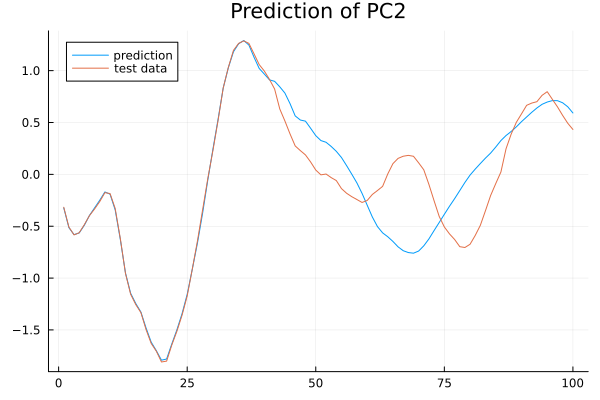

In [29]:
plot(prediction, label="prediction")
plot!(data_pc2_emb_test[1,:], label="test data", title="Prediction of PC2")

In [32]:
# store esn for later purposes
@save "C:/Users/lisah/Documents/Repos/enso_project.jl/esn_saves/mjo_tde_pecuzal_pc2.jld2" mjo_tde_pecuzal_pc2=esn
@save "C:/Users/lisah/Documents/Repos/enso_project.jl/esn_saves/mjo_tde_pecuzal_pc2_W.jld2" mjo_tde_pecuzal_pc2_W=W_out